# Project 2 -  Intermidiate Analytics : Regression

## Chetan Kulkarni

### Overview of the study

Our research study concerns property/housing prices in Australia especially in Queensland and New South Wales. . Australia is experiencing high population growth, generating high demand for housing. This housing boom has increased house prices and rents, as well as the availability of all types of housing. Subdivision regularly occurs in many areas, with numerous developers offering house and land packages. 

In [1391]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = 23, 8
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

### Data

The data set contains many features that describe characteristics of the property, including the number of bathrooms, bedrooms, state, square_meters, etc. 

room_type, property_type : property type is house, guest suite etc and room_type is private room, entire home etc

country, state : The country is Australia and state is New south wales and Queensland

In [1392]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/ALY6015 - Homework 2 - Australia - Current.csv")

In [1393]:
data.head(5)

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.86,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.99,$52.00,Private room,1.0,1.0,1.0


### Exploratory Data Analysis

Check for summary of the data

In [1394]:
data.describe()

,id,square_meters,bathrooms,bedrooms,beds
count,3.974000e+03,3974.000000,3969.000000,3972.000000,3973.000000
mean,1.905941e+07,32.657089,1.637314,2.262840,2.982884
std,9.691911e+06,12.485803,0.832215,1.368016,1.993749
min,2.982000e+04,0.000000,0.000000,0.000000,0.000000
25%,1.147178e+07,24.762500,1.000000,1.000000,1.000000
50%,2.023443e+07,29.720000,1.000000,2.000000,3.000000
75%,2.728201e+07,35.157500,2.000000,3.000000,4.000000
max,3.429629e+07,208.700000,9.000000,12.000000,18.000000


In [1395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
id                        3974 non-null int64
country                   3974 non-null object
state                     3781 non-null object
neighbourhood_cleansed    3974 non-null object
property_type             3974 non-null object
square_meters             3974 non-null float64
price                     3974 non-null object
room_type                 3974 non-null object
bathrooms                 3969 non-null float64
bedrooms                  3972 non-null float64
beds                      3973 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 341.6+ KB


### Observation1 : Our target value is to predict the price of the house, it is in dtype object, later we shall change into float values

Check the unique values in each columns

In [1396]:
data.nunique()

id                        3974
country                      1
state                        8
neighbourhood_cleansed       5
property_type                8
square_meters             2113
price                     1290
room_type                    3
bathrooms                   16
bedrooms                    12
beds                        17
dtype: int64

In [1397]:
data['state'].unique()

array(['NSW', 'New South Wales', nan, 'Nsw', 'nsw', 'QLD', 'Queensland',
       'queensland', 'Qld'], dtype=object)

Let's check the count of each unique text of state

In [1398]:
pd.DataFrame(data.groupby('state').count()['country'].rename('count')).reset_index()

,state,count
0,NSW,3609
1,New South Wales,115
2,Nsw,4
3,QLD,46
4,Qld,2
5,Queensland,1
6,nsw,3
7,queensland,1


### Observation 2: Convert all the data with New south wales, NSW, nsw to one unique value, Similarly do the same for values with QLD

### Data Cleaning and Processing

Let's create a duplicate copy of our data before we make changes

In [1399]:
data_cleaned = data.copy()

Convert all the data with New south wales, NSW, nsw to one unique value

In [1400]:
data_cleaned['state'].loc[data_cleaned['state'].isin(['NSW',
                                                      'New South Wales', 
                                                      'Nsw','nsw'])]='NSW'

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1401]:
data_cleaned['state'].loc[data_cleaned['state'].isin(['QLD', 
                                                      'Queensland',
                                                      'queensland','Qld'])]='QLD'

In [1402]:
pd.DataFrame(data_cleaned.groupby('state').count()['country'].rename('count')).reset_index()

,state,count
0,NSW,3731
1,QLD,50


Check the number of NA values apart from NSW and QLD

In [1403]:
sum(np.logical_and(data_cleaned['state'] != 'NSW',
                               data_cleaned['state'] != 'QLD'))

193

### Observation 3 : There are 193 NA values, need to impute these values to front fill 

Use the imputation method of front fill to fill all the NA/Null values

In [1404]:
data_cleaned.fillna(method = 'ffill', inplace = True)

Drop the columns id, country as they are not necessary for our analysis as country is australia and since python has its own index we can remove id

In [1405]:
data_cleaned = data_cleaned.drop(columns = ['id','country'])

There are few rows with the square_meters as 0 where as the values of house is provided for those data

In [1406]:
data_cleaned[(data_cleaned['square_meters'] == 0)]

,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,NSW,BALLINA SHIRE COUNCIL,House,0.0,"$2,900.00",Entire home/apt,3.0,4.0,4.0
3050,NSW,LISMORE CITY COUNCIL,Guesthouse,0.0,$99.00,Entire home/apt,1.0,0.0,1.0


### Observation 4 : There are 2 values of Sq_meteres with 0 but have price associated with it. Need to impute these values to with Median of Sq meteres

In [1407]:
sq_median = np.median(data_cleaned['square_meters'])

In [1408]:
data_cleaned.loc[data_cleaned['square_meters'] == 0,'square_meters'] = sq_median

### Observation 5 : As mentioned above in EDA, price is shown as object datatype, we have to change it to float, but before that we have remove the dollar and comma symbol.

To check the values of house price, let's first replace the $ and , values in price to make it numerical

In [1409]:
data_cleaned['price'] = data_cleaned['price'].apply(lambda x: str(x).replace('$', ''))
data_cleaned['price'] = data_cleaned['price'].apply(lambda x: str(x).replace(',', ''))

In [1410]:
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'] , errors='coerce')

### Data Visualization

Let us plot a distance plot to check the distribution of price of the data

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


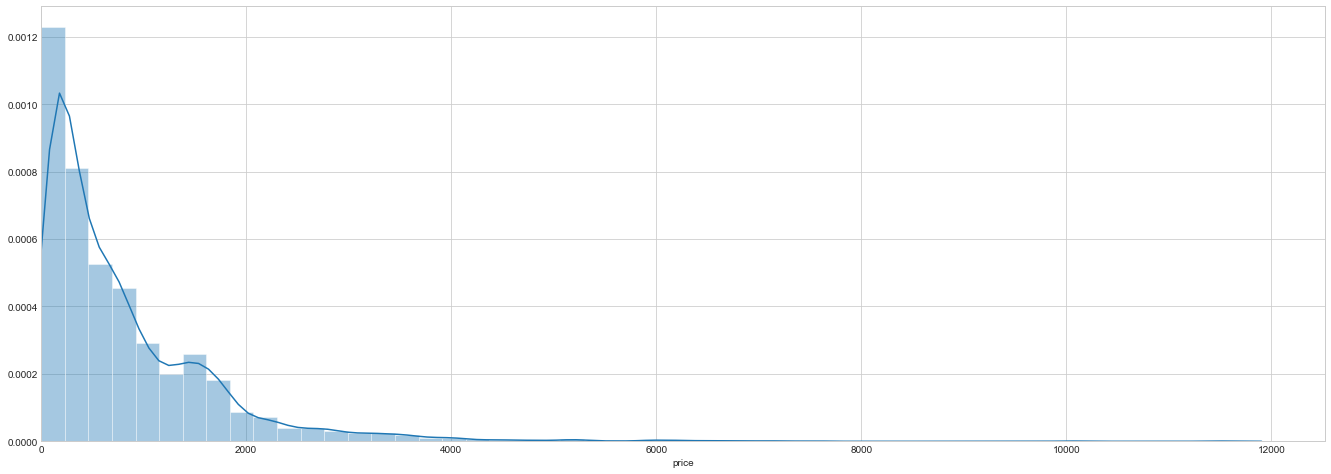

In [1411]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
ax = sns.distplot(data_cleaned['price'])
plt.xlim(0, None);

(array([3.028e+03, 7.280e+02, 1.450e+02, 4.600e+01, 1.200e+01, 1.000e+01,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.15090e+03, 2.30080e+03, 3.45070e+03, 4.60060e+03,
        5.75050e+03, 6.90040e+03, 8.05030e+03, 9.20020e+03, 1.03501e+04,
        1.15000e+04]),
 <a list of 10 Patch objects>)

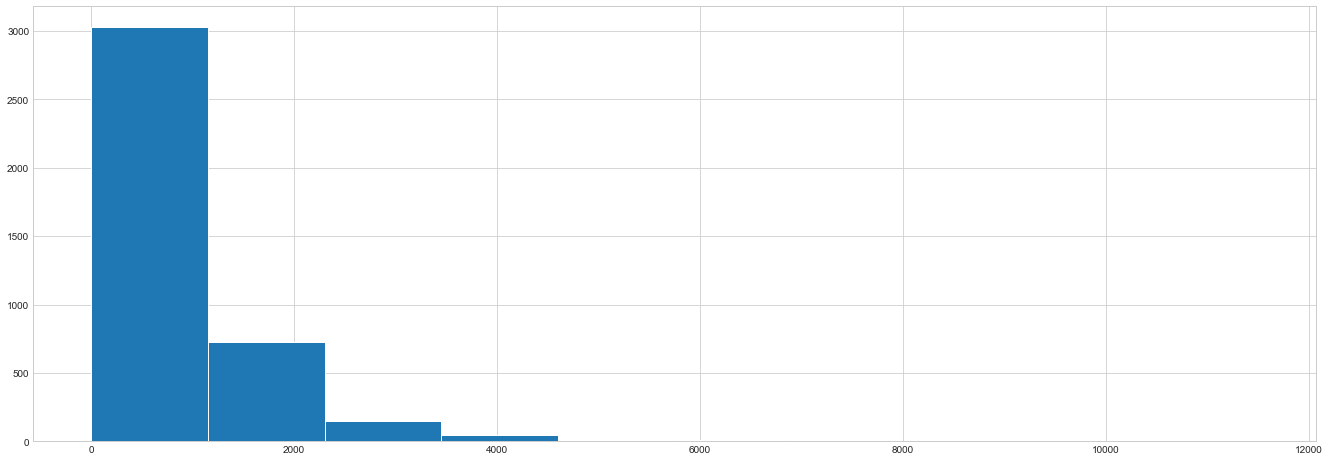

In [1412]:
plt.hist(data_cleaned['price'])

### Observation 6 : As we saw in above Figure, our response variable is positively skewed. We need data transformation

### Transform by log(1+x)

### Data Transformation
To maximize the performance of our model, we want to normalize our features and response variable. As we saw in above Figure, our response variable is positively skewed.

By applying a log transformation, Sale Price now resembles a normal distribution (Figure 4).We can see the distribution of the price is skewed towards left so we have to use logarithimic value to impute the data to make it more normal

(array([1.000e+00, 0.000e+00, 0.000e+00, 8.000e+01, 6.810e+02, 8.260e+02,
        1.103e+03, 9.930e+02, 2.660e+02, 2.400e+01]),
 array([0.69314718, 1.55885139, 2.4245556 , 3.29025981, 4.15596402,
        5.02166822, 5.88737243, 6.75307664, 7.61878085, 8.48448506,
        9.35018927]),
 <a list of 10 Patch objects>)

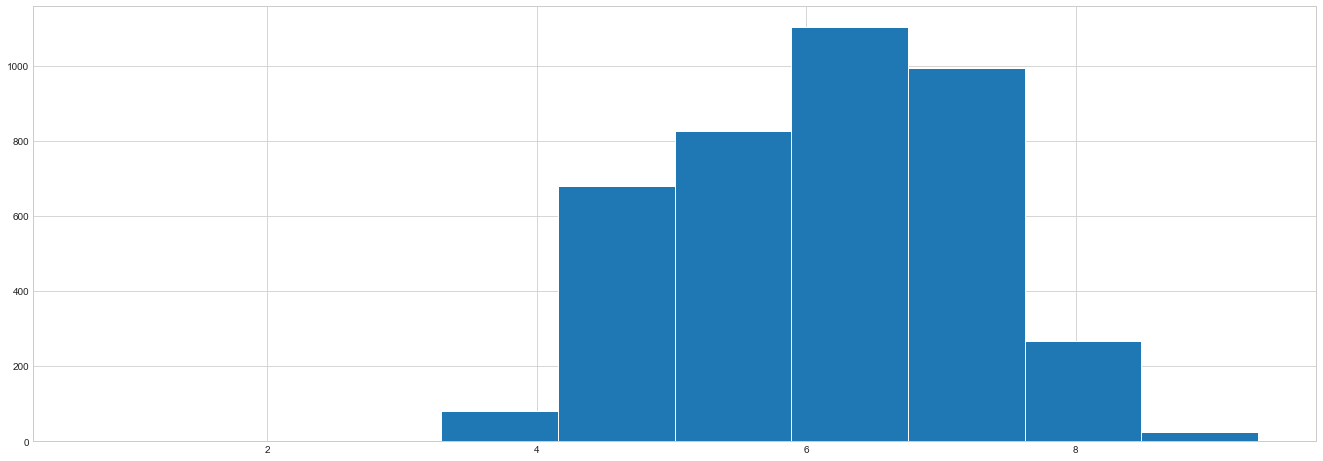

In [1413]:
data_cleaned['price'] = np.log1p(data_cleaned['price'])
plt.hist(data_cleaned['price'])

Now the data looks more of normal distribution

Check the data types of the data, The heat map shows the correlation among each feature and the response variable “Price”. This gives us information about the feature importance in predicting the Sale Price and indicates where there may be multicolinearity. Overall there are no highly correlated with Price or with each independent variable,  

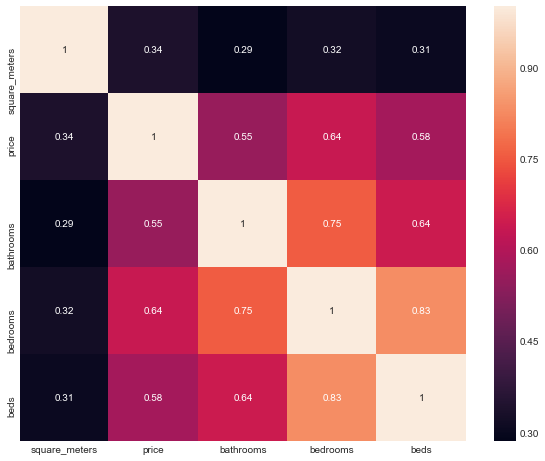

In [1414]:
plt.figure(figsize=(10,8))
sns.rx = set
df_corr = data_cleaned.corr()
sns.heatmap(data=df_corr, annot=True)

There is no much correlation observed between the numerical data values


### One-Hot Encoding

We’ll need to one-hot encode (or dummy code) our categorical variables so they can be interpreted by the model.

We use get dummies to change the categorical values to numerical values in the dataset

In [1415]:
data_cat = pd.get_dummies(data_cleaned.select_dtypes('object'),drop_first = True)
data_cat.head(5)
data_num = data_cleaned.select_dtypes('float64')
df = pd.concat([data_cat,data_num],axis = 1)
print(df.columns)
df.head(1)

Index(['state_QLD', 'neighbourhood_cleansed_BYRON SHIRE COUNCIL',
       'neighbourhood_cleansed_LISMORE CITY COUNCIL',
       'neighbourhood_cleansed_RICHMOND VALLEY COUNCIL',
       'neighbourhood_cleansed_TWEED SHIRE COUNCIL', 'property_type_Camper/RV',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_House', 'property_type_Loft',
       'property_type_Nature lodge', 'property_type_Other',
       'room_type_Private room', 'room_type_Shared room', 'square_meters',
       'price', 'bathrooms', 'bedrooms', 'beds'],
      dtype='object')


,state_QLD,neighbourhood_cleansed_BYRON SHIRE COUNCIL,neighbourhood_cleansed_LISMORE CITY COUNCIL,neighbourhood_cleansed_RICHMOND VALLEY COUNCIL,neighbourhood_cleansed_TWEED SHIRE COUNCIL,property_type_Camper/RV,property_type_Guest suite,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Nature lodge,property_type_Other,room_type_Private room,room_type_Shared room,square_meters,price,bathrooms,bedrooms,beds
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,29.72,7.972811,3.0,4.0,4.0


In [1420]:
df.columns

Index(['state_QLD', 'neighbourhood_cleansed_BYRON SHIRE COUNCIL',
       'neighbourhood_cleansed_LISMORE CITY COUNCIL',
       'neighbourhood_cleansed_RICHMOND VALLEY COUNCIL',
       'neighbourhood_cleansed_TWEED SHIRE COUNCIL', 'property_type_Camper/RV',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_House', 'property_type_Loft',
       'property_type_Nature lodge', 'property_type_Other',
       'room_type_Private room', 'room_type_Shared room', 'square_meters',
       'price', 'bathrooms', 'bedrooms', 'beds'],
      dtype='object')

In [1421]:
df.columns = ["state_QLD",'N_BSE','N_LCC','N_RVC','N_TSC','P_RV','P_G_Suite','P_G_house','P_House','P_Loft','P_Lodge',
               'P_other','R_Private','R_Shared','Sq_meters','price','Bathrooms','Bedrooms','Beds']

## Predictive Model (Classification) - Linear Regression

Goal is to predict price of the house based on the variables. Linear Regression helps to build the model using the training set, and then check the prediction using the testing set.


### Load Features and Targets
Now we will create the input features X and output feature Y from the dataset

In [1463]:
X = df.drop('price', axis =1).values
y = df['price'].values
y = y.reshape(data_length2,1)

### PolynomialFeatures 

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [1466]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(3974, 189)

### Import train_test_split and split train test data to 80-20 split X_poly and y

In [1467]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state =242)


### Fit the Model

In [1468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Create the linear regression object and train/fit models
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Make predictions using the testing set

In [1469]:
y_pred = linear_regression.predict(X_test)

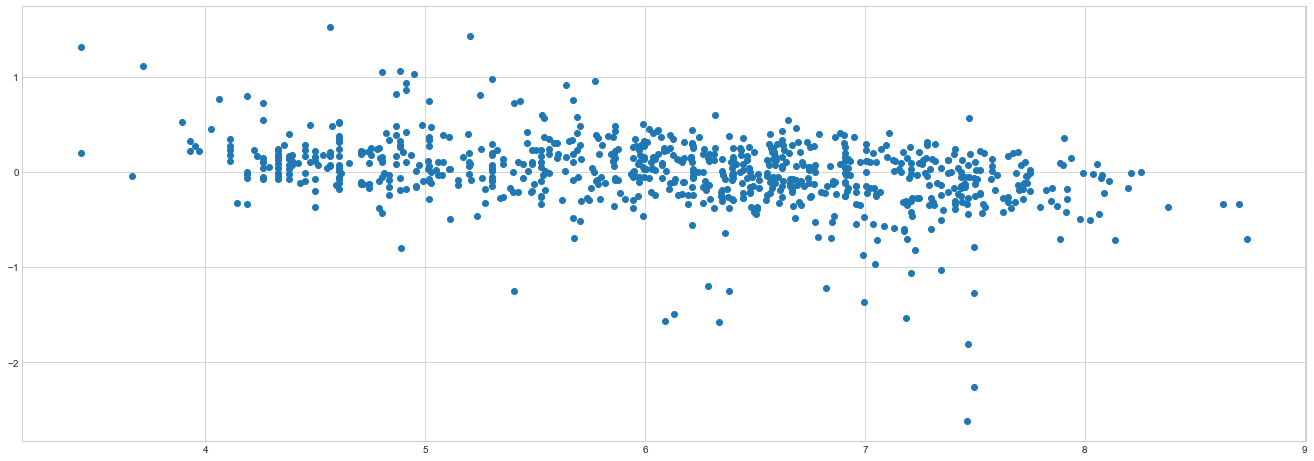

In [1470]:
Residual = y_pred - y_test
plt.scatter(y_test, Residual)

### Calculate mean_squared_error and r2_score

In [1462]:
#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, y_pred))

Mean Squared Error (MSE):0.13
Variance Score (R^2):0.88


Mean Squared Error (MSE) to identify the performance of the train and test, ultimately, to indicate any overfitting/underfitting in the models, here MSE is 0.13 which is mse for test data

R2 is 88% for test data, which is good as we have considered all the variables.

### Reglularization  

Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. In Linear regression minimizes a loss function, it chooses a coefficient for each feature variable, large coefficients can lead to overfitting, penalizing large coefficients can be done using Regularization.

### Steps :
- Practical way to handle regularization using Ridge :
- Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients. Minimization objective using sum of square of coefficients.
- Alpha: Parameter we need to choose
- Picking alpha or lambda here is similar to picking k in k-NN, using cross validation or grid search 
- Perform hyperparameter tuning, here alpha controls model complexity if alpha = 0: can lead to overfitting else if very high alpha: can lead to underfitting, we have to choose alpha accordingly.


In [1300]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

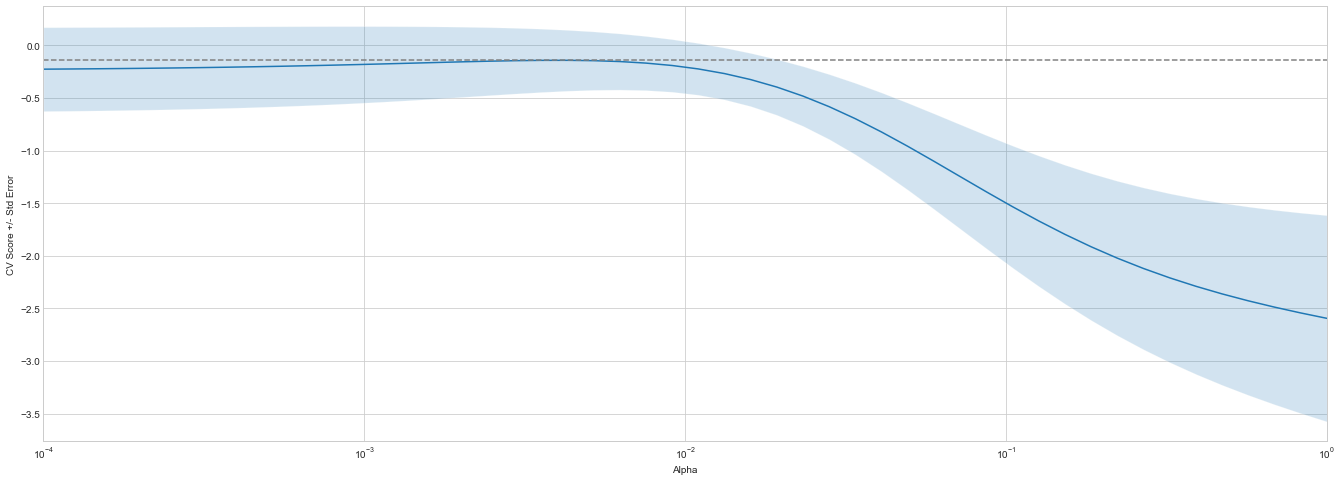

In [1471]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_poly, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

### Cross Validation score and Standard error is less as alpha is going down at 10^-2 and down. Hence we choose an alpha of 0.1 to apply for Ridge 

In [1472]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.765996764479742

### Conclusion

Using Polynomial we are getting R2 as 88% and as per ridge we can predict that the score with ridge in 76%

- We can make reasonable predictions about the price a house will sell for based on all the characteristics of the property.
- Key steps include assigning appropriate values for NAs, 
- Normalizing variables,
- Optimizing hyperparameters for candidate models
- Choosing the best alpha.

Assessing Models: We utilised the  Mean Squared Error (MSE) to identify the performance of the train and test, ultimately, to indicate any overfitting/underfitting in the models. Cross Validation assisted us with running permutations of the different parameters to produce the most effective model with the least MSE

### Below were some learnings and observations

Observation1 : Our target value is to predict the price of the house, it is in dtype object, later we shall change into float values

Observation 2: Convert all the data with New south wales, NSW, nsw to one unique value, Similarly do the same for values with QLD

Observation 3 : There are 193 NA values, need to impute these values to front fill

Observation 4 : There are 2 values of Sq_meteres with 0 but have price associated with it. Need to impute these values to with Median of Sq meteres

Observation 5 : As mentioned above in EDA, price is shown as object datatype, we have to change it to float, but before that we have remove the dollar and comma symbol.

Observation 6 : As we saw in above Figure, our response variable is positively skewed. We need data transformation
